![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [62]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [63]:
penguins_df_processed=pd.get_dummies(penguins_df, columns=['sex'], drop_first=True)

In [64]:
scaler=StandardScaler()
penguins_data_scaled =scaler.fit_transform(penguins_df_processed)

In [65]:
inertia_values = []
kmeans=KMeans()
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(penguins_data_scaled)  
    inertia_values.append(kmeans.inertia_)

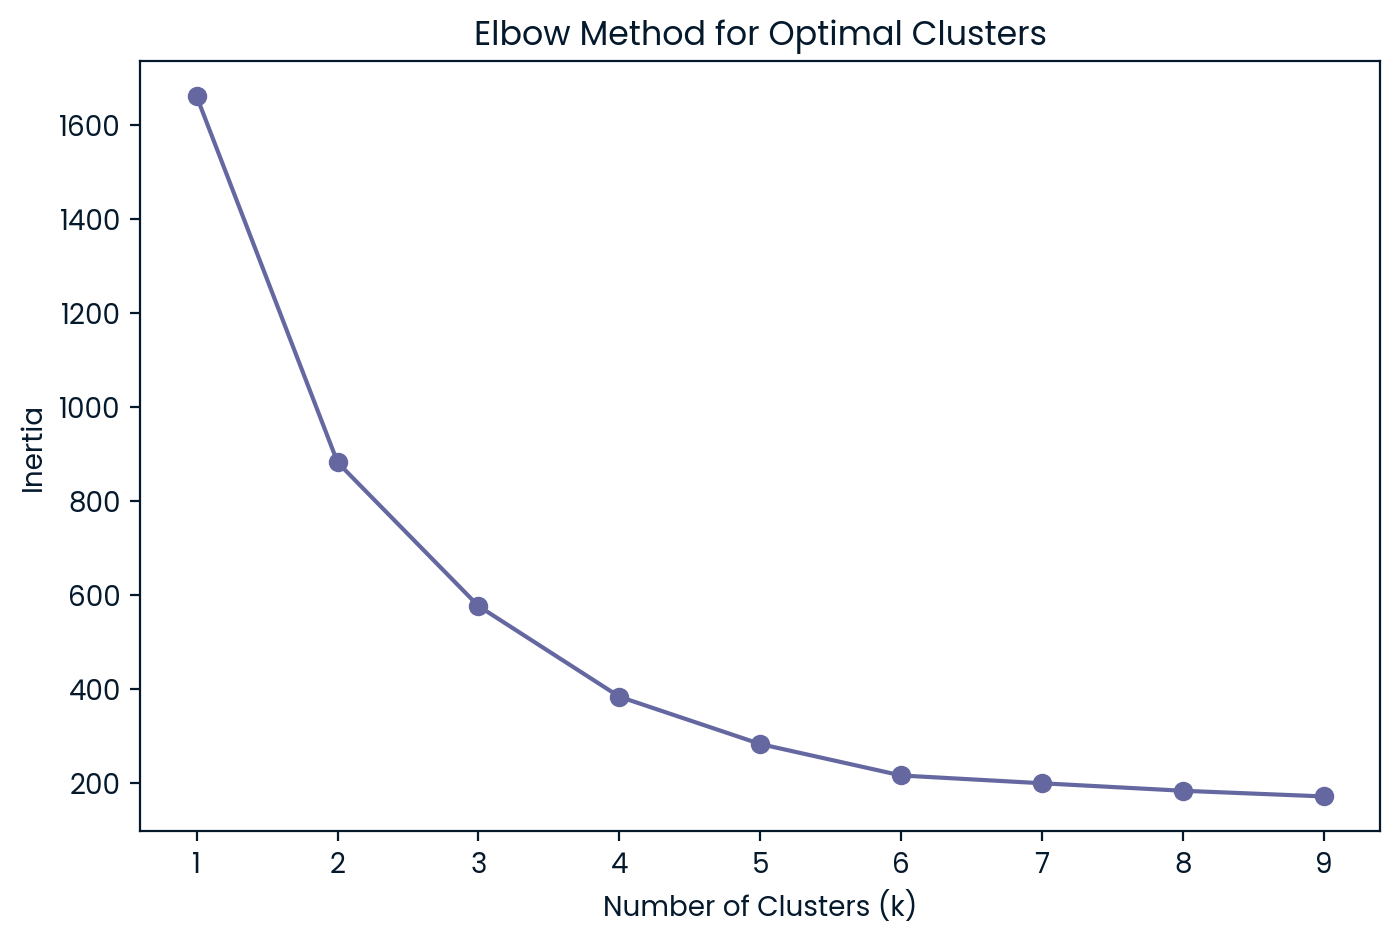

In [66]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), inertia_values, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

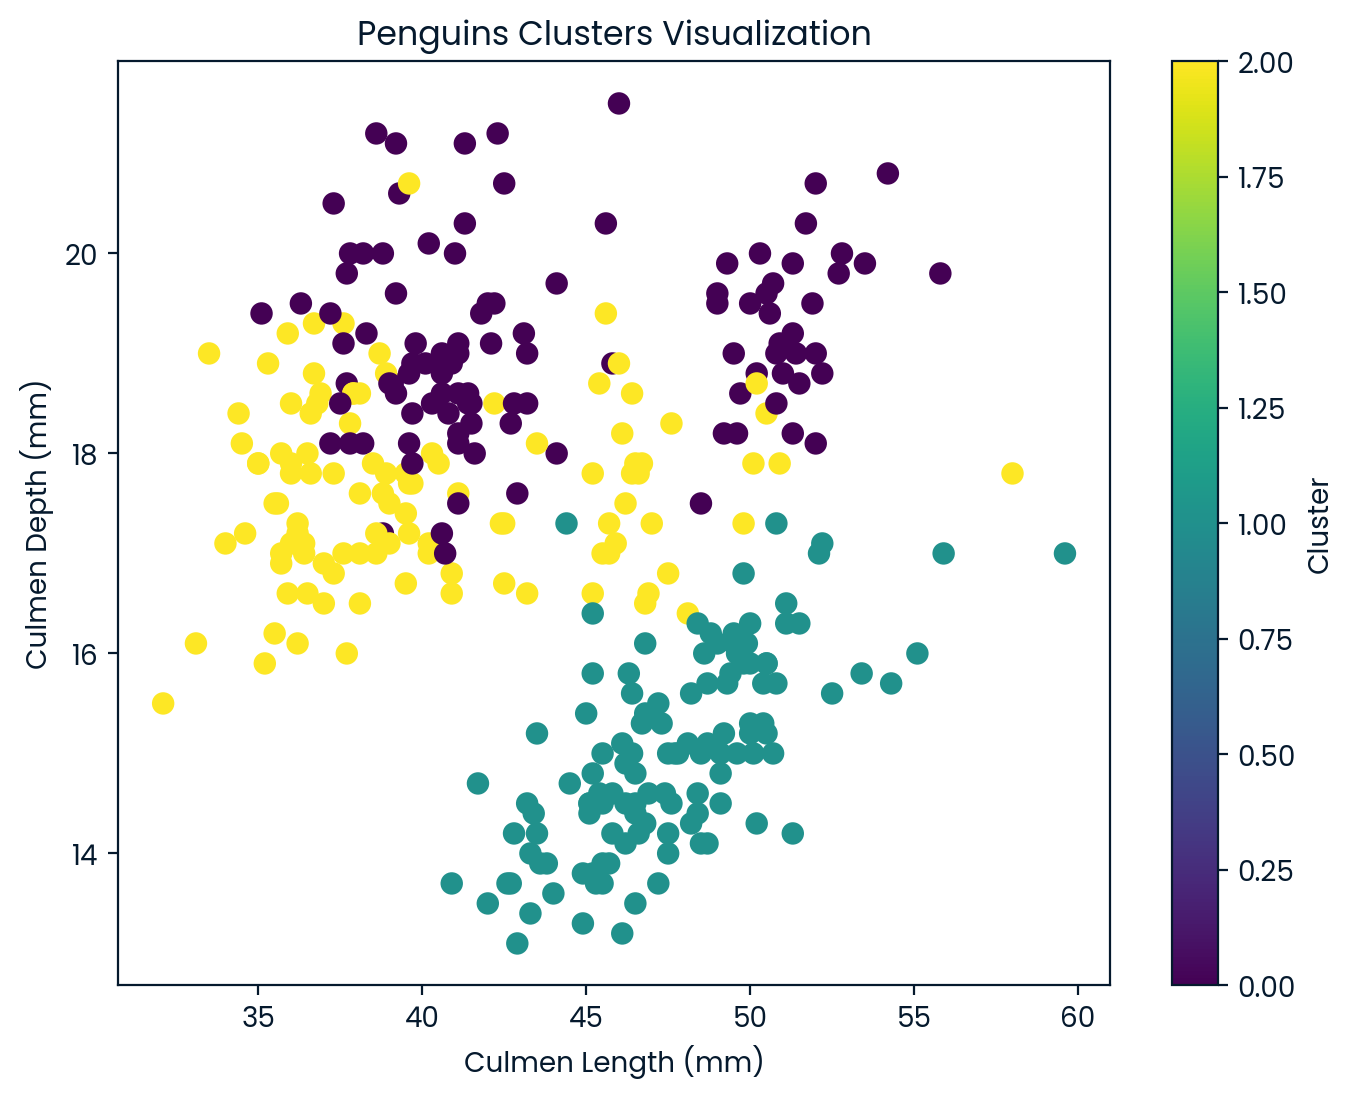

In [67]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(penguins_data_scaled)
penguins_df['label'] = kmeans.labels_
plt.figure(figsize=(8, 6))
plt.scatter(
    penguins_df['culmen_length_mm'], 
    penguins_df['culmen_depth_mm'], 
    c=penguins_df['label'], 
    cmap='viridis', 
    s=50
)
plt.title('Penguins Clusters Visualization')
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Culmen Depth (mm)')
plt.colorbar(label='Cluster')
plt.show()

In [68]:
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
stat_penguins=penguins_df.groupby('label')[numeric_columns].mean()

In [69]:
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
label,,,,
0,43.878302,19.111321,194.764151,4006.603774
1,47.568067,14.996639,217.235294,5092.436975
2,40.217757,17.611215,189.046729,3419.158879
